# Logistic Regression on Tibia Image data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
# load preprocessed data
# Load preprocessed features
train_set = pd.read_csv("processed_train_data.csv")
test_set = pd.read_csv("processed_test.csv")
blinded_set = pd.read_csv("processed_blinded.csv")

In [4]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,CLASS
0,-20.254918,-11.816786,7.721181,-22.200975,11.184909,-4.474965,-8.301945,4.837488,-12.058671,4.341580,...,1.332488,4.101566,-0.116355,0.292991,2.110754,-0.171883,-0.006246,0.989639,0.908850,0
1,32.305695,2.902794,13.718979,3.286547,0.319666,-3.324331,-11.060107,-6.662033,5.127994,1.310784,...,-0.494014,1.089264,-0.691181,0.128993,0.367804,-1.962637,0.379335,1.089207,1.321102,1
2,23.381443,-21.157155,-5.665036,14.268749,-15.844366,1.844153,5.304106,5.454495,-4.489206,-0.484316,...,-0.472052,-1.543800,1.514146,-0.281009,1.475308,0.609157,1.132597,-0.868555,1.189096,1
3,19.043521,-25.598421,-13.224314,7.761897,-6.593708,7.198904,7.961367,9.032086,-4.556410,1.246942,...,1.096091,1.237750,1.080236,-0.593135,0.988565,-0.001208,-0.449020,-1.353974,0.638011,0
4,-23.687339,1.823406,-9.798122,4.226764,-20.739776,11.559852,7.116380,-4.199494,0.864277,1.964546,...,-1.319001,-0.852188,2.639760,-0.645702,0.656799,-0.493082,0.239390,-0.693042,-0.146476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,27.044116,12.716636,-6.171388,-12.053018,13.617900,-11.929040,-7.552439,11.631972,-1.653580,-2.661517,...,1.154952,1.398318,-0.211585,0.588615,-0.819354,0.408989,-2.222092,-1.155756,-1.117775,0
311,26.221394,-14.260250,19.204397,1.481633,1.032072,-5.334652,-15.214931,-6.768873,-0.102625,2.138490,...,0.197879,-2.053515,-0.127215,-1.705115,0.404105,0.731010,0.123710,-0.157185,0.281191,1
312,-36.812084,-1.826755,-4.349765,-4.897593,8.529738,0.787663,20.418221,1.422052,6.086657,13.532061,...,0.217112,0.534492,-0.784716,-2.125310,1.108020,0.285424,-0.102221,-1.540048,1.290605,0
313,38.970088,33.206970,22.768953,-5.131721,4.810013,-15.190289,-33.669844,17.295553,-8.469611,4.890683,...,-2.232365,-1.728630,0.401501,-1.399326,1.010820,-0.741035,-0.249957,-1.601095,-0.867808,1


In [5]:
# split train_set into X and y variable
X_train = train_set.drop(columns=["CLASS"])
y_train = train_set["CLASS"]

In [6]:
X_test = test_set.drop(columns = ["CLASS"])
y_test = test_set["CLASS"]          

In [17]:
X_blinded = blinded_set

In [7]:
# logistic regression model
log_reg = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced')

In [8]:
# grid search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [9]:
# use stratiifed cross validation
cv = StratifiedKFold(n_splits=5)

In [10]:
# use grid serch to find best hyper parameter
grid = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [11]:
# best model
best_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1'}


### Evalute moderl performance on Test data

In [12]:
# predict probability and class labels
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test) 
y_pred = (y_pred >= 0.7).astype(int)  # apply threshold 0.7 and convert to binary labels

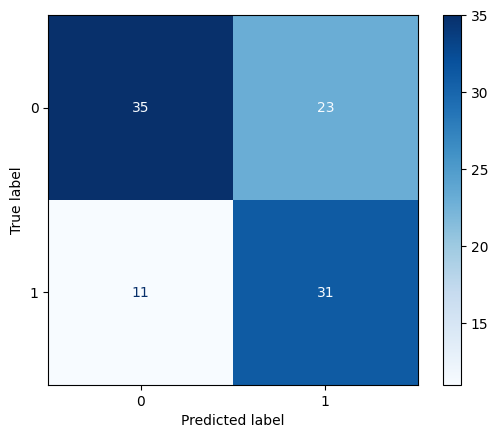

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [14]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUROC:", roc_auc_score(y_test, y_probs))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.66
AUROC: 0.6970443349753694
Sensitivity (Recall): 0.7380952380952381
Specificity: 0.603448275862069
F1 Score: 0.6458333333333334


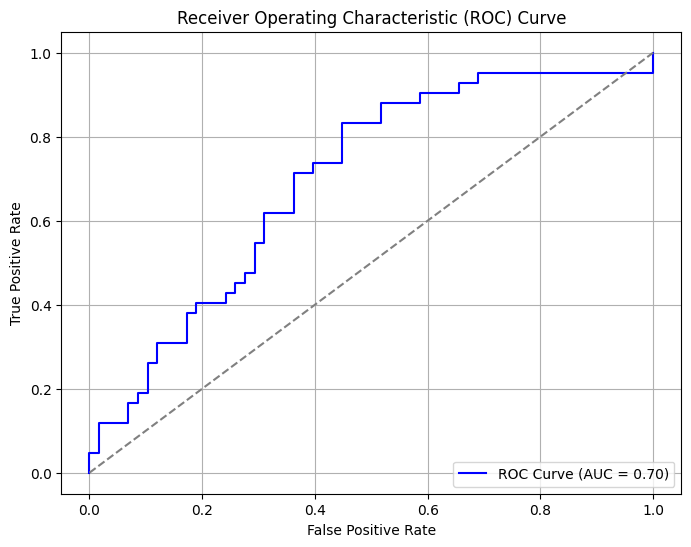

In [15]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Evaluete model performance on blinded data

In [20]:
# predict  class labels on blinded dataset
y_pred_blinded = best_model.predict(X_blinded) 
y_pred_blinded = (y_pred_blinded >= 0.7).astype(int)  # apply threshold 0.7 and convert to binary labels

In [21]:
y_pred_blinded

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])